# FINGER PRINT & IRIS TESTING

## Libraries Loading

In [1]:
from tensorflow.keras.models import model_from_json
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Model Loading

In [2]:
json_file = open('main_model/model.json', 'r')
model_json = json_file.read()
model = model_from_json(model_json)
model.load_weights("main_model/model.h5")

## Read the First Input

In [27]:
id_1 = input("Enter The Person ID:")

Enter The Person ID:1


In [28]:
original_fp_img = "original_fp_images/"+id_1+".bmp"

In [29]:
original_iris_img = "original_iris_images/"+id_1+".jpg"

In [30]:
input_fp = input("Enter input test finger print image name:")

Enter input test finger print image name:1_prasant


In [32]:
input_iris = input("Enter input test IRIS image name:")

Enter input test IRIS image name:2_ganesh


In [33]:
test_fp_img = "input_fp_images/"+input_fp+".bmp"

In [34]:
test_iris_img = "input_iris_images/"+input_iris+".jpg"

## Reading Original finger print images

In [35]:
image_fp_1 = cv2.imread(original_fp_img)
image_fp_1 = cv2.resize(image_fp_1,(90,90))
image_fp_1 = cv2.cvtColor(image_fp_1, cv2.COLOR_BGR2GRAY)
image_fp_1 = np.expand_dims(image_fp_1, axis = 2)

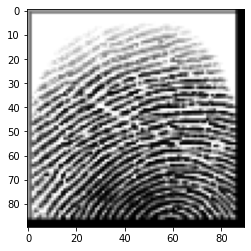

In [36]:
plt.imshow(image_fp_1, cmap="gray")

In [37]:
image_fp_1 = np.expand_dims(image_fp_1, axis = 0)
image_fp_1.shape

(1, 90, 90, 1)

## Reading Original Iris Images

In [38]:
image_iris_1 = cv2.imread(original_iris_img)
image_iris_1 = cv2.resize(image_iris_1,(90,90))
image_iris_1 = cv2.cvtColor(image_iris_1, cv2.COLOR_BGR2GRAY)
image_iris_1 = np.expand_dims(image_iris_1, axis = 2)

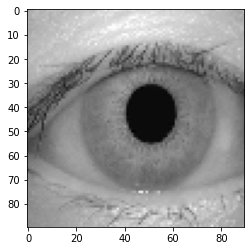

In [39]:
plt.imshow(image_iris_1, cmap="gray")

In [40]:
image_iris_1 = np.expand_dims(image_iris_1, axis = 0)
image_iris_1.shape

(1, 90, 90, 1)

## Reading Test Finger Print images

In [41]:
image_fp_2 = cv2.imread(test_fp_img)
image_fp_2 = cv2.resize(image_fp_2,(90,90))
image_fp_2 = cv2.cvtColor(image_fp_2, cv2.COLOR_BGR2GRAY)
image_fp_2 = np.expand_dims(image_fp_2, axis = 2)

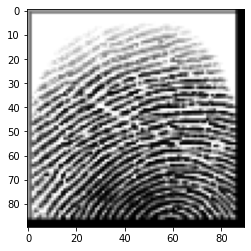

In [42]:
plt.imshow(image_fp_2, cmap="gray")

In [43]:
image_fp_2 = np.expand_dims(image_fp_2, axis = 0)
image_fp_2.shape

(1, 90, 90, 1)

## Reading Test Iris images

In [44]:
image_iris_2 = cv2.imread(test_iris_img)
image_iris_2  = cv2.resize(image_iris_2,(90,90))
image_iris_2  = cv2.cvtColor(image_iris_2 , cv2.COLOR_BGR2GRAY)
image_iris_2  = np.expand_dims(image_iris_2 , axis = 2)

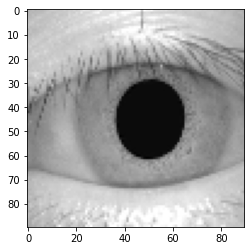

In [45]:
plt.imshow(image_iris_2, cmap="gray")

In [46]:
image_iris_2 = np.expand_dims(image_iris_2, axis = 0)
image_iris_2.shape

(1, 90, 90, 1)

## Model Prediction

In [47]:
prediction1 = model.predict([image_fp_1, image_fp_2])

In [48]:
print("Matching Score:",prediction1)

Matching Score: [[0.99999917]]


In [49]:
prediction2 = model.predict([image_iris_1, image_iris_2])

In [51]:
print("Matching Score:",prediction2)

Matching Score: [[0.]]


In [52]:
total_avg_score = (prediction1 + prediction2) / 2

In [53]:
total_avg_score

array([[0.49999958]], dtype=float32)

## Result

In [54]:
if total_avg_score > .80:
    print("Authentication Success")
else:
    print("Authentication Failed")

Authentication Failed


## Thank You